In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [4]:
df = pd.read_csv('/content/internet_service_churn.csv')
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  bool   
 2   is_movie_package_subscriber  72274 non-null  bool   
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  bool   
dtypes: bool(3), float64(4), int64(4)
memory usage: 4.6 MB


In [12]:
df.describe()

,id,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000
mean,8.463182e+05,2.450051,18.942483,0.502319,0.274234,43.606146,4.181047,0.207613
std,4.891022e+05,2.034990,13.215386,0.669524,0.816621,63.249082,9.794153,0.997123
min,1.500000e+01,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,0.930000,13.000000,0.000000,0.000000,6.800000,0.500000,0.000000
50%,8.477840e+05,1.980000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000
75%,1.269562e+06,3.300000,22.000000,1.040000,0.000000,60.200000,4.800000,0.000000
max,1.689744e+06,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


In [5]:
df['is_tv_subscriber'] = df['is_tv_subscriber'].astype(bool)
df['is_movie_package_subscriber'] = df['is_movie_package_subscriber'].astype(bool)
df['churn'] = df['churn'].astype(bool)

In [6]:
for col in ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].median())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].median())

In [8]:
df = df.dropna()

In [9]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 id  subscription_age      bill_avg  reamining_contract  \
count  7.227400e+04      72274.000000  72274.000000        72274.000000   
mean   8.463182e+05          2.450051     18.942483            0.502319   
std    4.891022e+05          2.034990     13.215386            0.669524   
min    1.500000e+01         -0.020000      0.000000            0.000000   
25%    4.222165e+05          0.930000     13.000000            0.000000   
50%    8.477840e+05          1.980000     19.000000            0.000000   
75%    1.269562e+06          3.300000     22.000000            1.040000   
max    1.689744e+06         12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  download_over_limit  
count           72274.000000  72274.000000  72274.000000         72274.000000  
mean                0.274234     43.606146      4.181047             0.207613  
std                 0.816621     63.249082      9.794153        

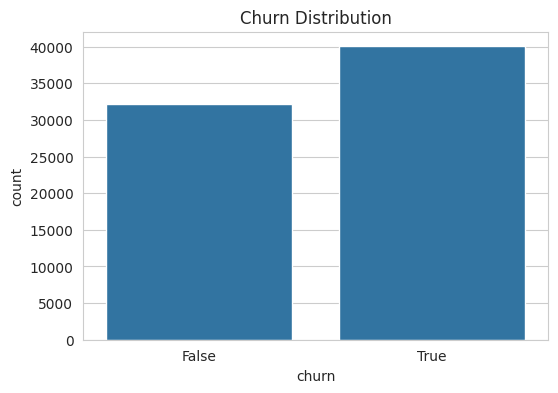

In [22]:
# Plot 1: Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.savefig('churn_distribution.png')
plt.show()

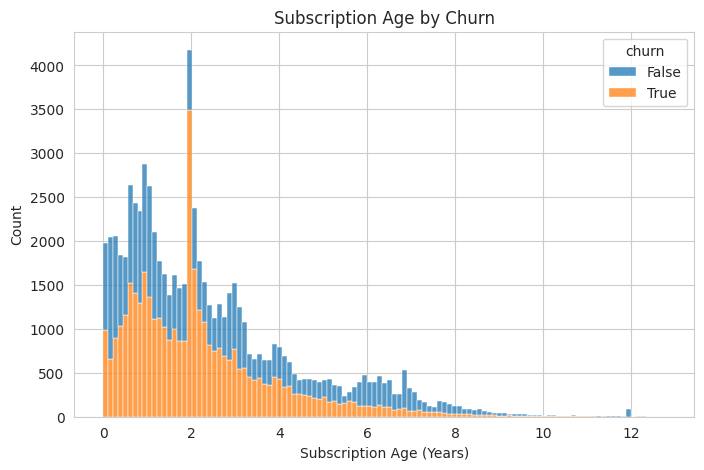

In [23]:
# Plot 2: Subscription Age by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='subscription_age', hue='churn', multiple='stack')
plt.title('Subscription Age by Churn')
plt.xlabel('Subscription Age (Years)')
plt.savefig('subscription_age_churn.png')
plt.show()

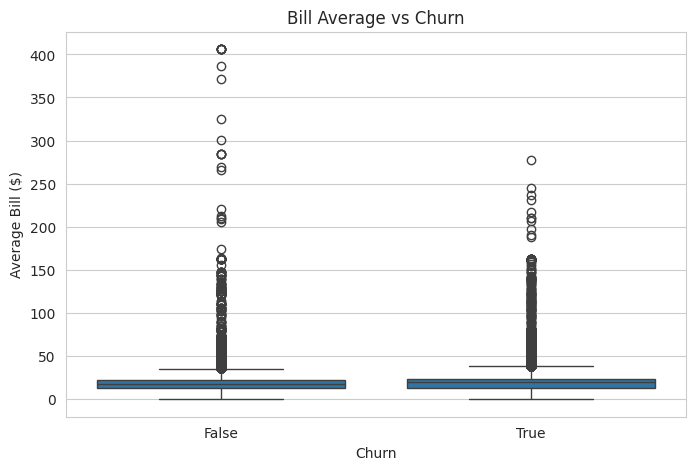

In [24]:
# Plot 3: Bill Average vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='bill_avg', data=df)
plt.title('Bill Average vs Churn')
plt.xlabel('Churn')
plt.ylabel('Average Bill ($)')
plt.savefig('bill_avg_churn.png')
plt.show()

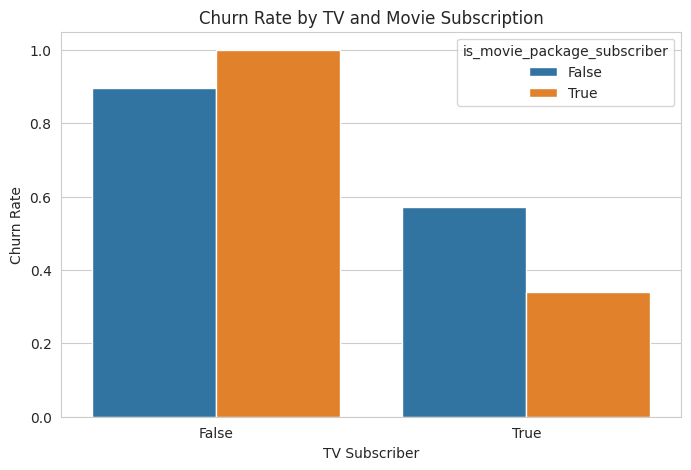

In [25]:
# Plot 4: Churn Rate by TV and Movie Subscription
plt.figure(figsize=(8, 5))
churn_rate = df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])['churn'].mean().reset_index()
sns.barplot(x='is_tv_subscriber', y='churn', hue='is_movie_package_subscriber', data=churn_rate)
plt.title('Churn Rate by TV and Movie Subscription')
plt.xlabel('TV Subscriber')
plt.ylabel('Churn Rate')
plt.savefig('churn_rate_subscription.png')
plt.show()

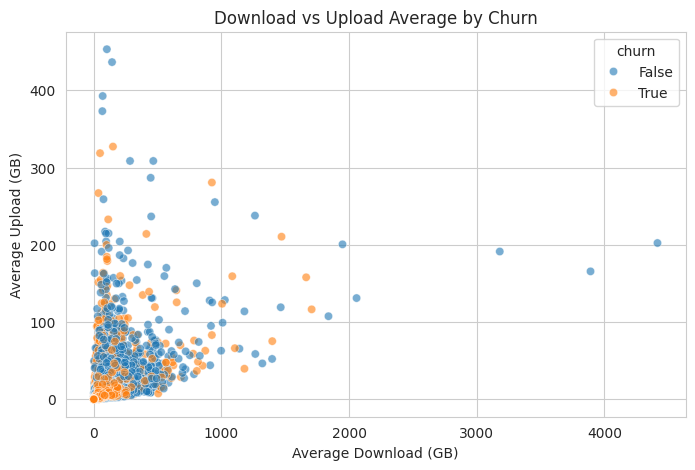

In [26]:
# Plot 5: Download vs Upload Average by Churn
plt.figure(figsize=(8, 5))
sns.scatterplot(x='download_avg', y='upload_avg', hue='churn', data=df, alpha=0.6)
plt.title('Download vs Upload Average by Churn')
plt.xlabel('Average Download (GB)')
plt.ylabel('Average Upload (GB)')
plt.savefig('download_upload_churn.png')
plt.show()

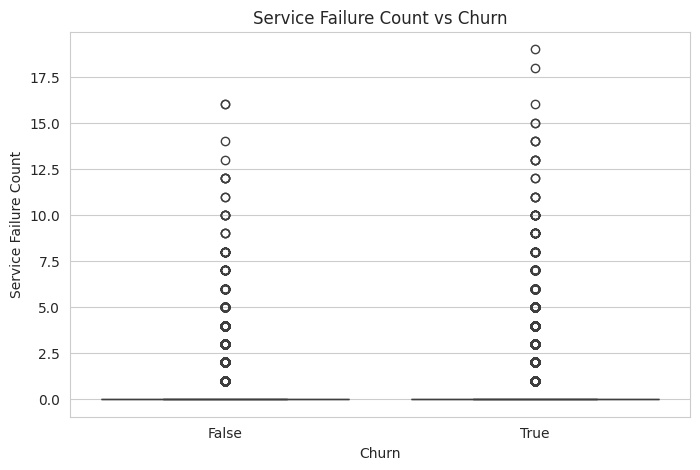

In [27]:
# Plot 6: Service Failure Count vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='service_failure_count', data=df)
plt.title('Service Failure Count vs Churn')
plt.xlabel('Churn')
plt.ylabel('Service Failure Count')
plt.savefig('service_failure_churn.png')
plt.show()


In [29]:
df['has_contract'] = df['reamining_contract'] > 0
print("\n=== Churn Rate by Contract ===")
print(df.groupby('has_contract')['churn'].mean())


=== Churn Rate by Contract ===
has_contract
False    0.949255
True     0.117650
Name: churn, dtype: float64
